In [128]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
import math
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
torch.manual_seed(1122)

Using cuda device


In [129]:
theta = [0.1, 1, 1.8, 2]

def gaussian(x, mu):
    return (1 / (0.3 * math.sqrt(2 * math.pi))) * (math.e ** ((-1/2) * (((x - mu) / 0.3)) ** 2))

def gaussian_mixture(x):
    return gaussian(x, theta[0]) + gaussian(x, theta[1]) + gaussian(x, theta[2]) + gaussian(x, theta[3])


In [130]:
class SmallNN(nn.Module):
    def __init__(self):
        super(SmallNN, self).__init__()
        self.lin1 = nn.Linear(1, 4)
        self.lin2 = nn.Linear(4, 8)
        self.lin3 = nn.Linear(8, 4)
        self.lin4 = nn.Linear(4, 1)
    
    def forward(self, x):
        x = torch.relu(self.lin1(x))
        x = torch.relu(self.lin2(x))
        x = torch.relu(self.lin3(x))
        return self.lin4(x)

model = SmallNN().to(device)
L = nn.MSELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
model, device

(SmallNN(
   (lin1): Linear(in_features=1, out_features=4, bias=True)
   (lin2): Linear(in_features=4, out_features=8, bias=True)
   (lin3): Linear(in_features=8, out_features=4, bias=True)
   (lin4): Linear(in_features=4, out_features=1, bias=True)
 ),
 'cuda')

In [131]:
epochs = 5000

X = torch.randn(1000, 1).to(device)
Y = gaussian_mixture(X).to(device)

for e in range(epochs):
    y_pred = model(X)
    loss = L(y_pred, Y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (e + 1) % 100 == 0:
        print(f"Epoch [{e+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/5000], Loss: 0.0834
Epoch [200/5000], Loss: 0.0773
Epoch [300/5000], Loss: 0.0737
Epoch [400/5000], Loss: 0.0704
Epoch [500/5000], Loss: 0.0664
Epoch [600/5000], Loss: 0.0622
Epoch [700/5000], Loss: 0.0600
Epoch [800/5000], Loss: 0.0581
Epoch [900/5000], Loss: 0.0565
Epoch [1000/5000], Loss: 0.0550
Epoch [1100/5000], Loss: 0.0535
Epoch [1200/5000], Loss: 0.0521
Epoch [1300/5000], Loss: 0.0506
Epoch [1400/5000], Loss: 0.0490
Epoch [1500/5000], Loss: 0.0473
Epoch [1600/5000], Loss: 0.0455
Epoch [1700/5000], Loss: 0.0435
Epoch [1800/5000], Loss: 0.0414
Epoch [1900/5000], Loss: 0.0391
Epoch [2000/5000], Loss: 0.0368
Epoch [2100/5000], Loss: 0.0343
Epoch [2200/5000], Loss: 0.0318
Epoch [2300/5000], Loss: 0.0291
Epoch [2400/5000], Loss: 0.0262
Epoch [2500/5000], Loss: 0.0234
Epoch [2600/5000], Loss: 0.0210
Epoch [2700/5000], Loss: 0.0510
Epoch [2800/5000], Loss: 0.0314
Epoch [2900/5000], Loss: 0.0311
Epoch [3000/5000], Loss: 0.0304
Epoch [3100/5000], Loss: 0.0304
Epoch [3200/5000]

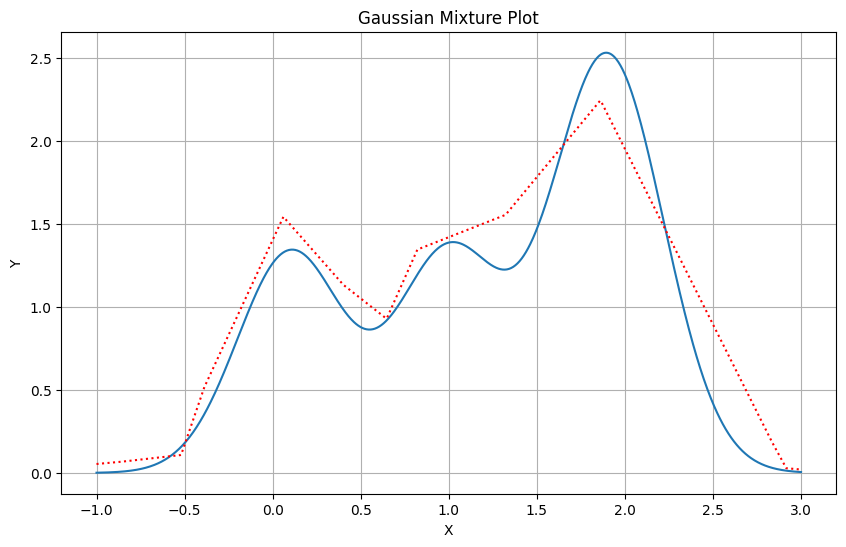

In [132]:
test_X = torch.linspace(-1, 3, 1000)
test_Y = gaussian_mixture(test_X)
model_Y = model(test_X.reshape(-1, 1).to(device))
model_Y = model_Y.cpu()
plt.figure(figsize=(10, 6))
plt.plot(test_X.numpy(), test_Y.numpy(), label='Gaussian Mixture')
plt.plot(test_X.numpy(), model_Y.detach().numpy(), label='Predictions', color='red', linestyle='dotted')
plt.title('Gaussian Mixture Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()